# Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
DATA_PATH = "../data"
df_train = pd.read_csv(f"{DATA_PATH}/train.csv")
df_test = pd.read_csv(f"{DATA_PATH}/test.csv")

# Histogram

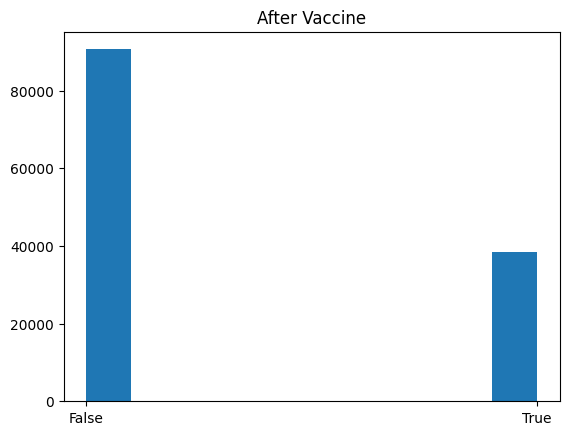

In [3]:
plt.hist(df_train["After Vaccine"].astype(str))
plt.title("After Vaccine")
plt.show()

# Barplot

In [39]:
def create_barplot(y:str, x:str="Year") -> None:
    _, ax = plt.subplots(figsize=(10,4))
    sns.barplot(data=df_train.loc[df_train["Location"]=="World"], x=x, y=y, saturation=1, edgecolor='white')
    sns.despine()
    ax.get_legend()
    plt.title(f"{y} by {x} worldwise")
    plt.show()

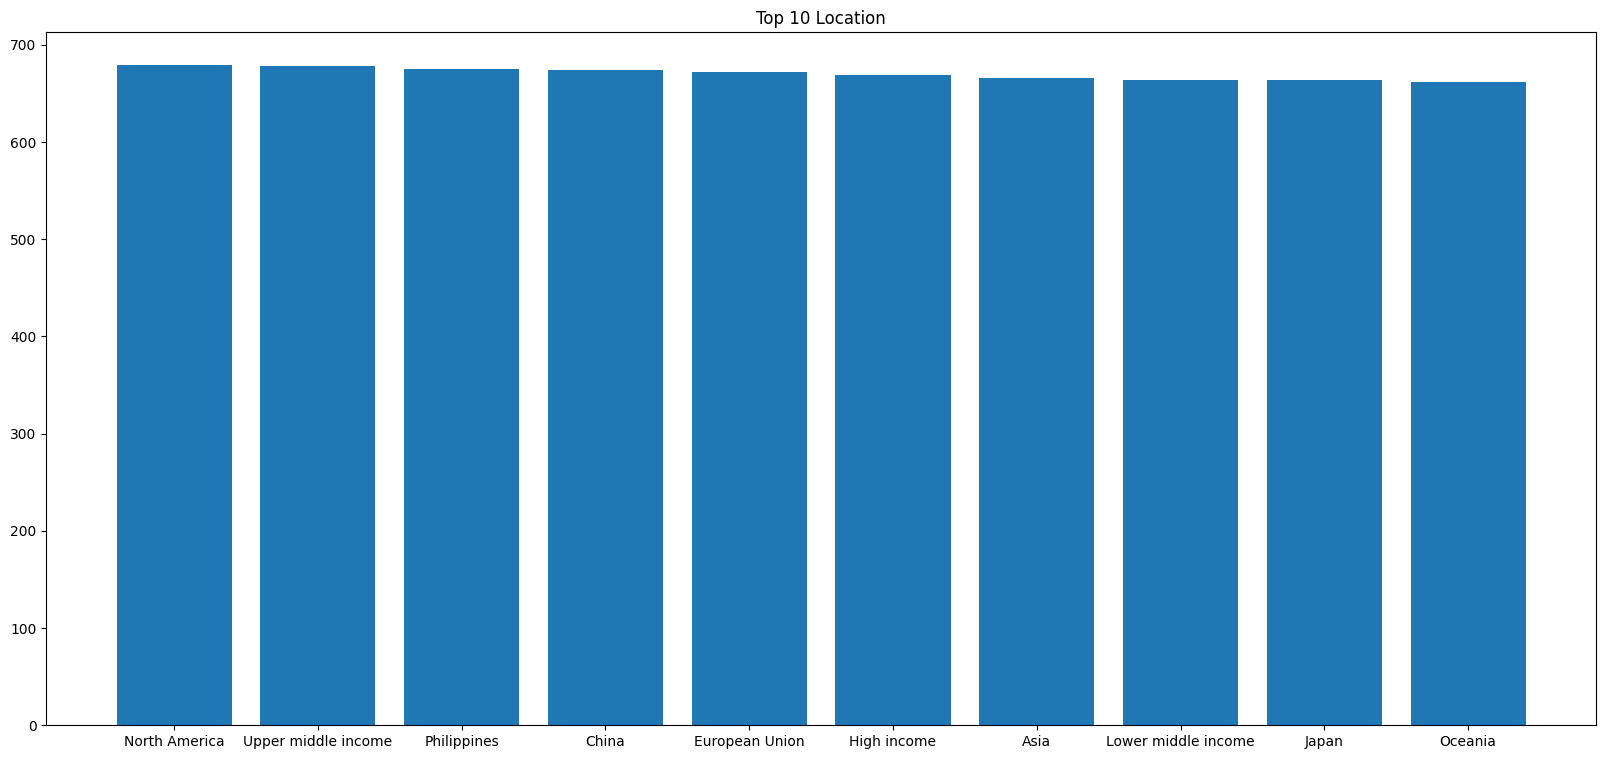

In [23]:
location_counts = list(df_train["Location"].astype(str).value_counts().to_dict().items())
bin_num = 10
plt.figure(figsize=(20,9))
plt.bar([it[0] for it in location_counts[:bin_num]], [it[1] for it in location_counts[:bin_num]])
plt.title(f"Top {bin_num} Location")
plt.show()

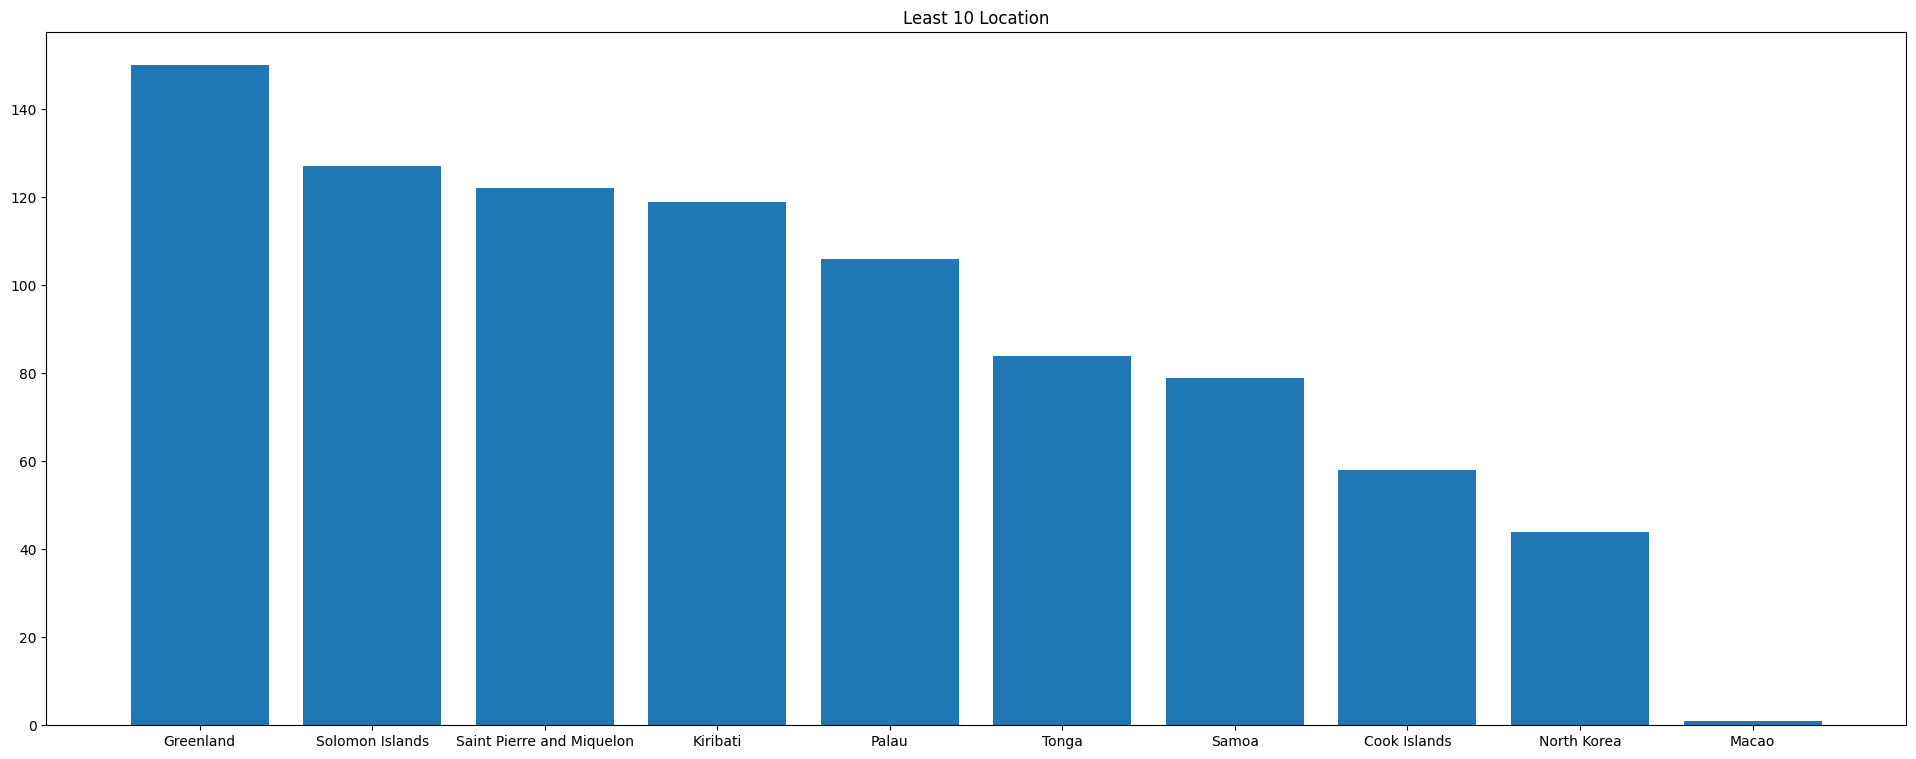

In [25]:
plt.figure(figsize=(24,9))
plt.bar([it[0] for it in location_counts[len(location_counts) - bin_num:]], [it[1] for it in location_counts[len(location_counts) -bin_num : ]])
plt.title(f"Least {bin_num} Location")
plt.show()

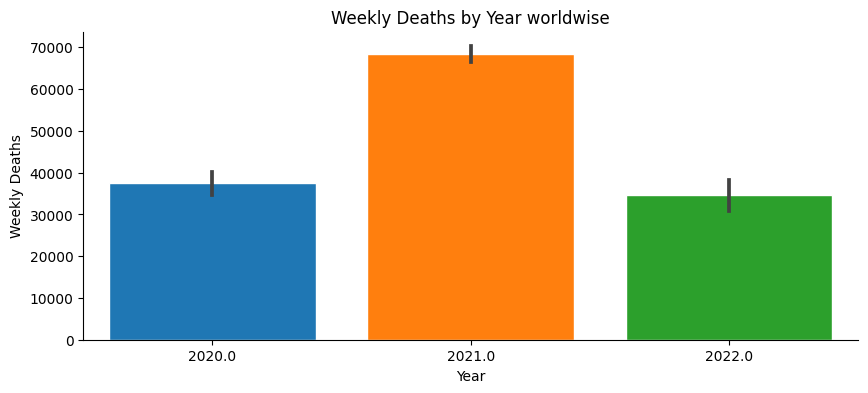

In [40]:
create_barplot("Weekly Deaths")

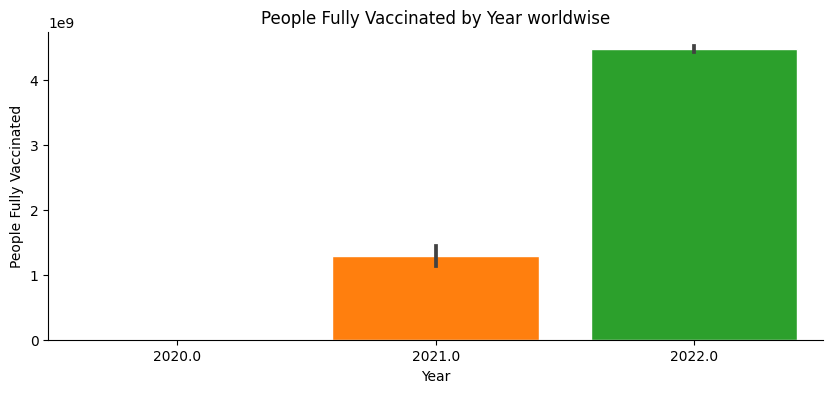

In [41]:
create_barplot("People Fully Vaccinated")

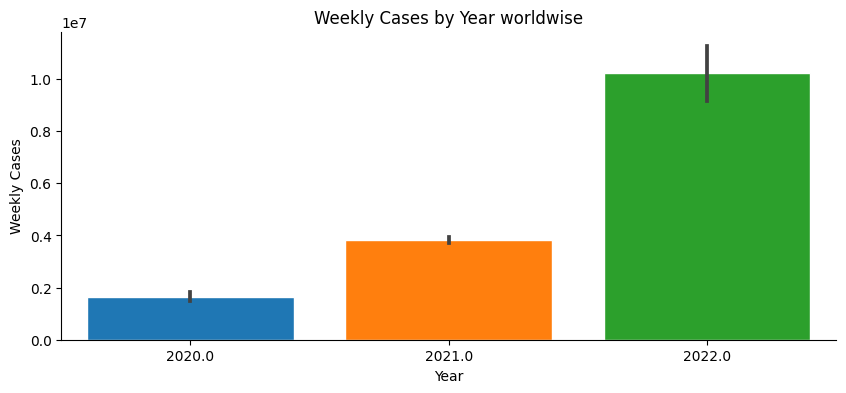

In [44]:
create_barplot("Weekly Cases")

# Boxplot